In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib notebook

Diffusion equation in 1D is given by $\partial_t \psi(t,x) = D \partial_x^2 \psi(t,x)$. Using 2nd order discretization in time and space, we obtain

$\frac{\psi(t+\Delta t,x) - \psi(t-\Delta t,x)}{2 \Delta t} =
  D \frac{\psi(t, x+\Delta x) - 2\psi(t, x) + \psi(t, x-\Delta x)}{\Delta x^2}
$

The stensil becomes

$\psi_{+, 0} = \psi_{-,0} + \zeta (\psi_{0,+} - 2\psi_{0,0} + \psi_{0,-})$

where $\zeta = \frac{2 D \Delta t}{\Delta x^2}$

0.25
0.5 0.5000000000000333


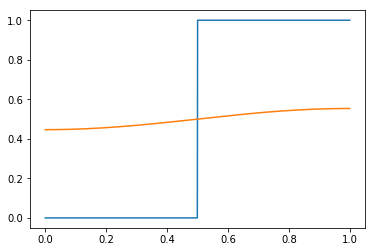

In [2]:
Diff = 1.0
DX = 0.001
DT = 0.25 * DX**2 / Diff    # 0.5 * DX**2 / Diff is the VonNeumann Stability bound
ZETA = Diff * DT / (DX**2)
T = 1.0
NX = int(1 / DX)
NT = 1000000#int(T / DT)

print(ZETA)

def initState(nx):
    x = np.linspace(0, 1, NX)
    y = np.array([int(xval > 0.5) for xval in x])
#     y = np.exp(-(x - 0.5)**2/(2 * 0.02)) / np.sqrt(2 * np.pi * 0.02)
    
    
    return x, y

def update(uthis, zeta):
    unew = np.zeros(NX)
    unew[1:-1] = uthis[1:-1] + zeta*(uthis[:-2] - 2.0*uthis[1:-1] + uthis[2:])
    unew[0] = uthis[1]
    unew[-1] = uthis[-2]
    
#     unew[0]  = uthis[0]  + zeta*(-2.0*uthis[0] + uthis[1])
#     unew[-1] = uthis[-1] + zeta*(uthis[-2] - 2.0*uthis[-1])
    return unew

x,y = initState(NX)
uthis = copy.deepcopy(y)
for i in range(NT):
    uthis = update(uthis, ZETA)
    
print(np.sum(y)/NX, np.sum(uthis)/NX)
    
plt.plot(x,y)
plt.plot(x,uthis)
plt.show()

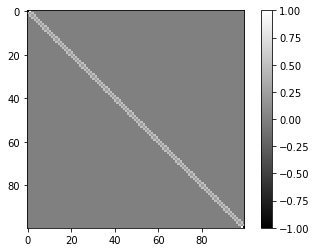

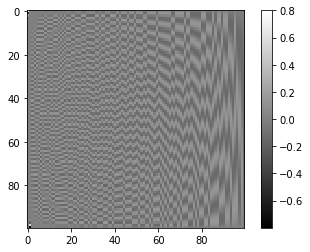

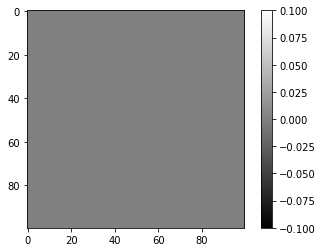

In [35]:
MATSIZE = 100
M = np.zeros((MATSIZE, MATSIZE))
M[0, :2] = np.array([-1, 1])
M[-1, -2:] = np.array([1, -1])
for i in range(1, MATSIZE-1):
    M[i, i-1:i+2] = np.array([0.5, 0.25, 0.5])

plt.figure()
plt.imshow(M, cmap='gray')
plt.colorbar()

evals, evecs = np.linalg.eig(M.T)
idxsort = np.argsort(evals)

plt.figure()
plt.imshow(np.real(evecs[:, idxsort]), cmap='gray')
plt.colorbar()

plt.figure()
plt.imshow(np.imag(evecs[:, idxsort]), cmap='gray')
plt.colorbar()

# So, the optimal basis is more or less fourier series.